# Clasify the ciirosis in 4 stage

## Columns
1. ID: unique identifier
2. N_Days: number of days between registration and the earlier of death, transplantation, or study analysis time in July 1986
3. Status: status of the patient C (censored), CL (censored due to liver tx), or D (death)
4. Drug: type of drug D-penicillamine or placebo
5. Age: age in [days]
6. Sex: M (male) or F (female)
7. Ascites: presence of ascites N (No) or Y (Yes)
8. Hepatomegaly: presence of hepatomegaly N (No) or Y (Yes)
9. Spiders: presence of spiders N (No) or Y (Yes)
10. Edema: presence of edema N (no edema and no diuretic therapy for edema), S (edema present without diuretics, or edema resolved by diuretics), or Y (edema despite diuretic therapy)
11. Bilirubin: serum bilirubin in [mg/dl]
12. Cholesterol: serum cholesterol in [mg/dl]
13. Albumin: albumin in [gm/dl]
14. Copper: urine copper in [ug/day]
15. Alk_Phos: alkaline phosphatase in [U/liter]
16. SGOT: SGOT in [U/ml]
17. Triglycerides: triglicerides in [mg/dl]
18. Platelets: platelets per cubic [ml/1000]
19. Prothrombin: prothrombin time in seconds [s]
20. Stage: histologic stage of disease (1, 2, 3, or 4)

## BIAS
Gender, Age


## Deatils of study
During 1974 to 1984, 424 PBC patients referred to the Mayo Clinic qualified for the randomized placebo-controlled trial testing the drug D-penicillamine. Of these, the initial 312 patients took part in the trial and have mostly comprehensive data. The remaining 112 patients didn't join the clinical trial but agreed to record basic metrics and undergo survival tracking. Six of these patients were soon untraceable after their diagnosis, leaving data for 106 of these individuals in addition to the 312 who were part of the randomized trial.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import sys

sys.path.append("./my-staff")

from globals import PATH_DS, TARGET
from utils import show_data
from database import dump_ds


In [2]:
IN_PATH = PATH_DS + "cirrhosis_source.csv"

In [3]:
df = pd.read_csv(IN_PATH)

In [4]:
df.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [5]:
df.shape

(418, 20)

In [6]:
df.dtypes

ID                 int64
N_Days             int64
Status            object
Drug              object
Age                int64
Sex               object
Ascites           object
Hepatomegaly      object
Spiders           object
Edema             object
Bilirubin        float64
Cholesterol      float64
Albumin          float64
Copper           float64
Alk_Phos         float64
SGOT             float64
Tryglicerides    float64
Platelets        float64
Prothrombin      float64
Stage            float64
dtype: object

In [7]:
df.drop(["ID"], axis=1, inplace=True)  # Remove not importan columns
df["Age"] = df["Age"] / 365

In [8]:
df.isnull().sum()

N_Days             0
Status             0
Drug             106
Age                0
Sex                0
Ascites          106
Hepatomegaly     106
Spiders          106
Edema              0
Bilirubin          0
Cholesterol      134
Albumin            0
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
dtype: int64

## Show bias columns

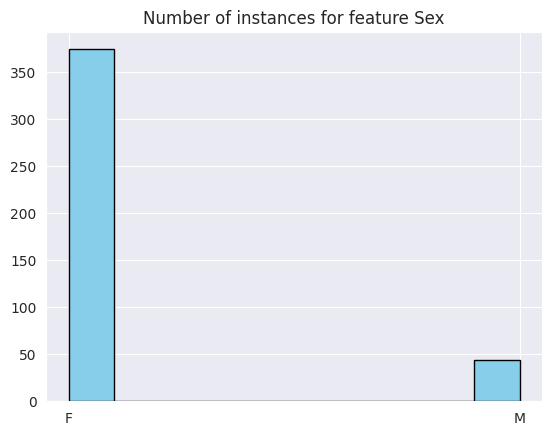

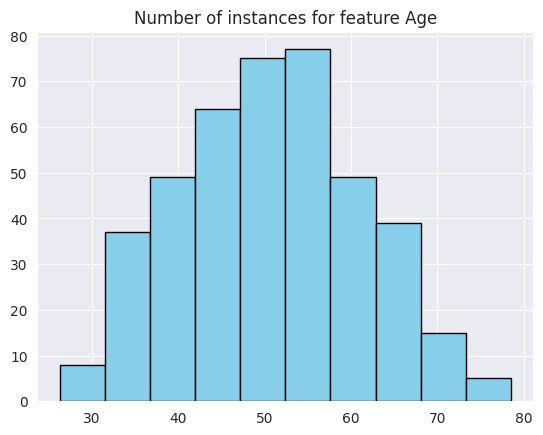

In [9]:
for col in ["Sex", "Age"]:
    plt.title("Number of instances for feature " + col)
    plt.hist(list(df[col]), bins=10, color='skyblue', edgecolor='black')
    plt.show()


In [10]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
N_Days,418.0,1917.782297,1104.672992,41.00000,1092.750000,1730.000000,2613.500000,4795.000000
Age,418.0,50.776306,10.454370,26.29589,42.861644,51.035616,58.280822,78.493151
Bilirubin,418.0,3.220813,4.407506,0.30000,0.800000,1.400000,3.400000,28.000000
Cholesterol,284.0,369.510563,231.944545,120.00000,249.500000,309.500000,400.000000,1775.000000
Albumin,418.0,3.497440,0.424972,1.96000,3.242500,3.530000,3.770000,4.640000
Copper,310.0,97.648387,85.613920,4.00000,41.250000,73.000000,123.000000,588.000000
Alk_Phos,312.0,1982.655769,2140.388824,289.00000,871.500000,1259.000000,1980.000000,13862.400000
SGOT,312.0,122.556346,56.699525,26.35000,80.600000,114.700000,151.900000,457.250000
Tryglicerides,282.0,124.702128,65.148639,33.00000,84.250000,108.000000,151.000000,598.000000
Platelets,407.0,257.024570,98.325585,62.00000,188.500000,251.000000,318.000000,721.000000


## Preprocesing of the paper

1. Drop all the rows where miss value (NA) were present in the Drug column
2. Impute missing values with mean results
3. One-hot encoding for all category attributes

In [11]:
# Drop when Drug in None
df_cleaned = df.dropna(subset=['Drug'])
print(len(df_cleaned))


312


In [12]:
df_cleaned.isnull().sum()


N_Days            0
Status            0
Drug              0
Age               0
Sex               0
Ascites           0
Hepatomegaly      0
Spiders           0
Edema             0
Bilirubin         0
Cholesterol      28
Albumin           0
Copper            2
Alk_Phos          0
SGOT              0
Tryglicerides    30
Platelets         4
Prothrombin       0
Stage             0
dtype: int64

In [13]:
columns_with_nulls = df_cleaned.columns[df_cleaned.isnull().any()]
print(columns_with_nulls)

Index(['Cholesterol', 'Copper', 'Tryglicerides', 'Platelets'], dtype='object')


In [14]:
import numpy as np

# Fill missing values in numerical columns with the column mean
numerical_cols = df_cleaned.select_dtypes(include=[np.number]).columns
print(numerical_cols)
df_cleaned[numerical_cols] = df_cleaned[numerical_cols].fillna(df_cleaned[numerical_cols].mean())

Index(['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
       'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin',
       'Stage'],
      dtype='object')


/tmp/ipykernel_10018/953120661.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[numerical_cols] = df_cleaned[numerical_cols].fillna(df_cleaned[numerical_cols].mean())


## Distribution

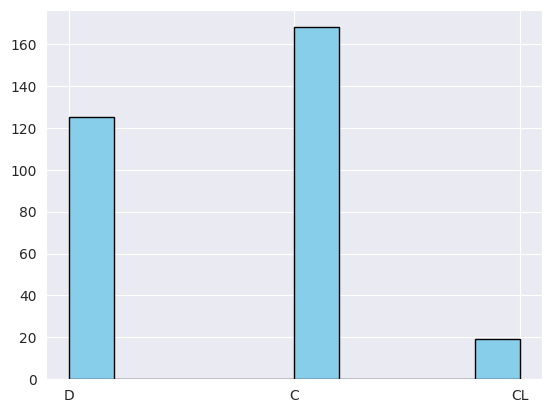

In [15]:
plt.hist(df_cleaned[TARGET], color='skyblue', edgecolor='black')
plt.show()

Status
C     168
D     125
CL     19
Name: count, dtype: int64


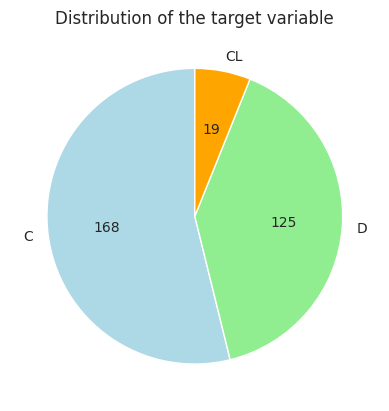

In [16]:
counts = df_cleaned[TARGET].value_counts()

print(counts)
# Configurar colores
colors = ['lightblue', 'lightgreen', 'orange']

# Crear el gráfico circular
plt.pie(counts, labels=counts.index, colors=colors, autopct=lambda x: f'{int(round(x * sum(counts) / 100.0))}',
        startangle=90)

# Agregar título
plt.title('Distribution of the target variable')

# Mostrar el gráfico
plt.show()

## Save before removing undersampling class

In [17]:
df_cleaned.to_csv(PATH_DS + "cleaned_cirrhosis_all.csv", index=False)

## Apreciaciones

EN este punto vemos que la clase CL sufre de "undersampling" como no es el objetivo principal pasamos a borrar todas sus instancias y convertimso el problema clasificación binaria

In [18]:
df_cleaned = df_cleaned[df_cleaned[TARGET] != 'CL']
df_cleaned.shape

(293, 19)

## Correlation

In [19]:
import seaborn as sns


In [20]:
string_cols = set(df_cleaned.select_dtypes(include=['object']).columns)
print(string_cols)
for col in string_cols:
    print(col, df_cleaned[col].unique())

{'Spiders', 'Status', 'Sex', 'Edema', 'Ascites', 'Hepatomegaly', 'Drug'}
Spiders ['Y' 'N']
Status ['D' 'C']
Sex ['F' 'M']
Edema ['Y' 'N' 'S']
Ascites ['Y' 'N']
Hepatomegaly ['Y' 'N']
Drug ['D-penicillamine' 'Placebo']


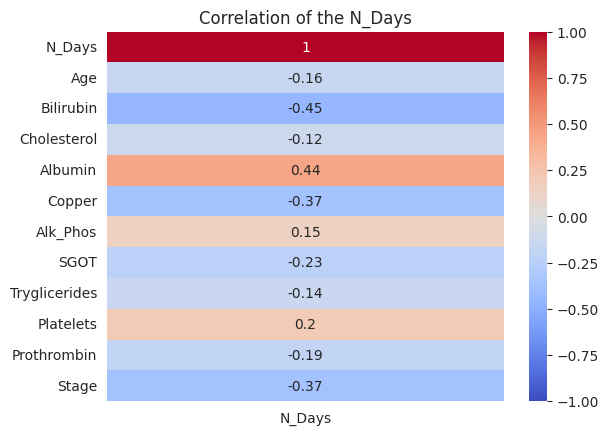

In [21]:
plt.title("Correlation of the N_Days")
df_correlated = df_cleaned.drop(columns=string_cols, inplace=False)
sns.heatmap(df_correlated.corr()[["N_Days"]], annot=True, vmin=-1, vmax=1, cmap="coolwarm")
plt.show()

In [22]:
df_cleaned.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
N_Days,293.0,2038.665529,1137.329811,41.00000,1216.00000,1882.000000,2772.000000,4556.000000
Age,293.0,50.627117,10.569813,26.29589,42.99726,50.575342,57.235616,78.493151
Bilirubin,293.0,3.264164,4.648182,0.30000,0.80000,1.300000,3.400000,28.000000
Cholesterol,293.0,365.210871,212.755715,120.00000,253.00000,320.000000,390.000000,1775.000000
Albumin,293.0,3.516997,0.422920,1.96000,3.31000,3.550000,3.800000,4.640000
Copper,293.0,95.939579,84.207819,4.00000,41.00000,71.000000,123.000000,588.000000
Alk_Phos,293.0,2011.670990,2195.956590,289.00000,858.00000,1258.000000,2009.000000,13862.400000
SGOT,293.0,122.066143,57.757400,26.35000,79.05000,111.000000,151.900000,457.250000
Tryglicerides,293.0,124.134340,61.555800,44.00000,87.00000,114.000000,144.000000,598.000000
Platelets,293.0,259.541776,95.527975,62.00000,198.00000,255.000000,322.000000,563.000000


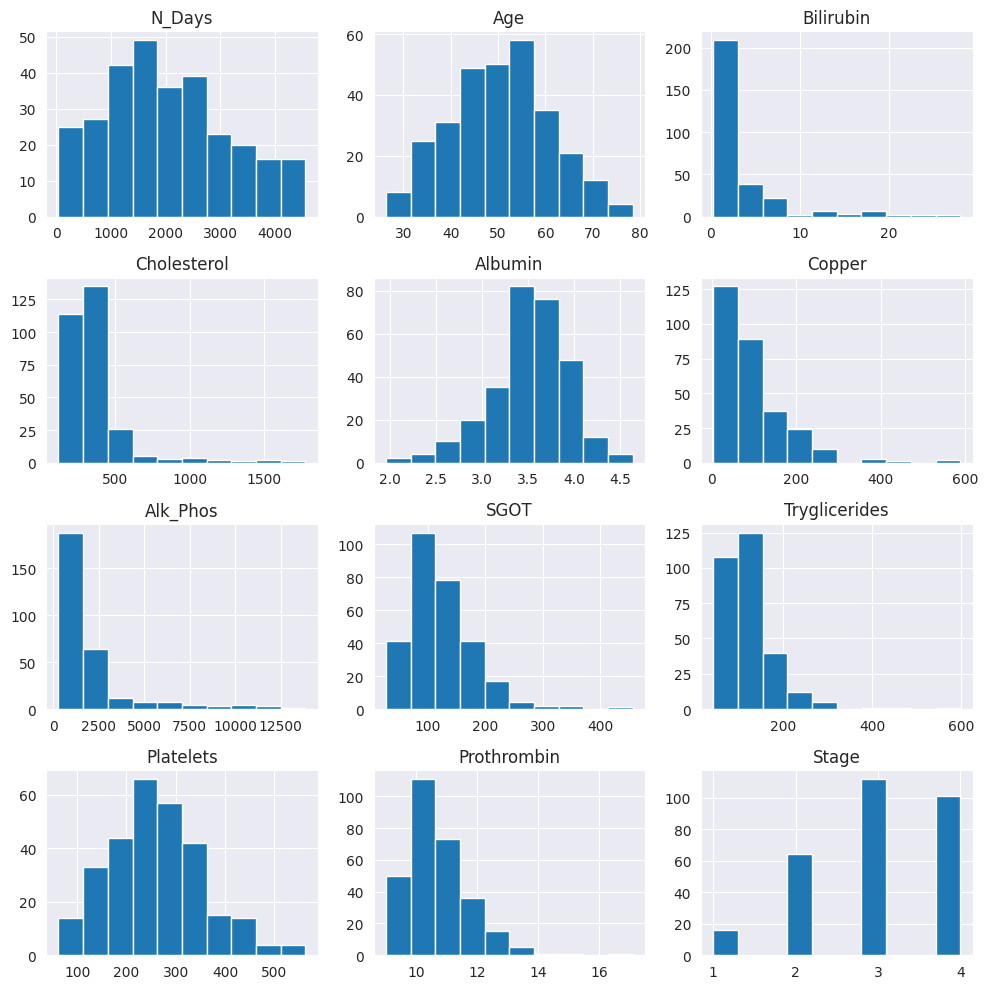

In [23]:
df_cleaned.hist(figsize=(10, 10))
plt.tight_layout()

In [24]:
string_cols_features = string_cols.copy()
string_cols_features.remove(TARGET)
print(string_cols_features)

{'Spiders', 'Sex', 'Edema', 'Drug', 'Hepatomegaly', 'Ascites'}


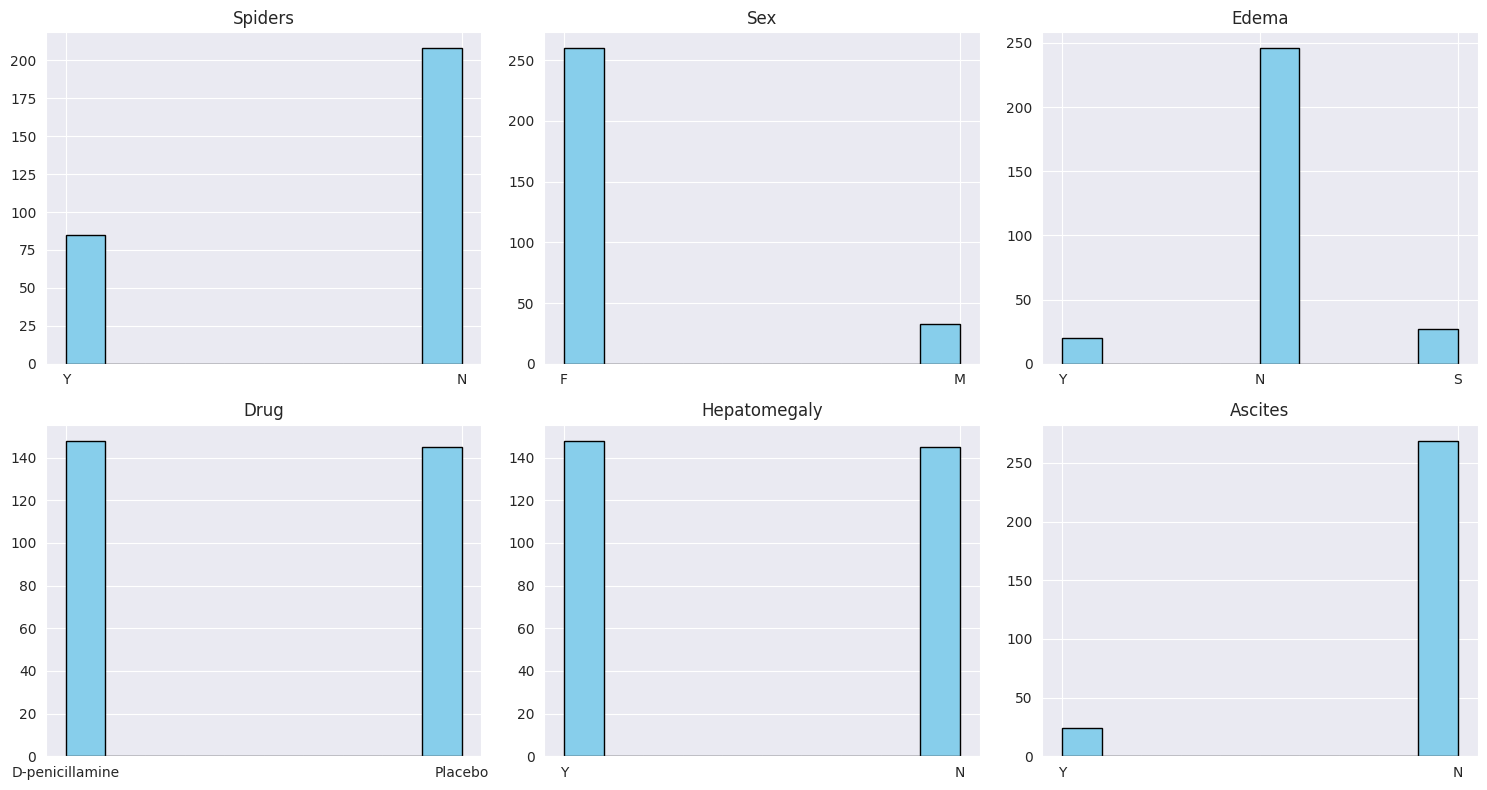

In [25]:
import math

plots_per_row = 3
# Create a figure with subplots
num_cols = len(string_cols_features)
num_rows = math.ceil(num_cols / plots_per_row)  # Adjust the number of columns per row as needed

# Create a figure with subplots
fig, axes = plt.subplots(num_rows, plots_per_row, figsize=(15, 4*num_rows))

# Loop through the string columns and create histograms
for i, var in enumerate(string_cols_features):
    row_idx, col_idx = divmod(i, plots_per_row)  # Calculate the row and column index
    axes[row_idx][col_idx].set_title(var)
    axes[row_idx][col_idx].hist(df_cleaned[var], color='skyblue', edgecolor='black')


if num_cols % plots_per_row != 0:
    for i in range(num_cols % 3, 3):
        fig.delaxes(axes[-1][i])


# Adjust spacing between subplots
plt.tight_layout()

# Show the combined plot
plt.show()


# Outliers

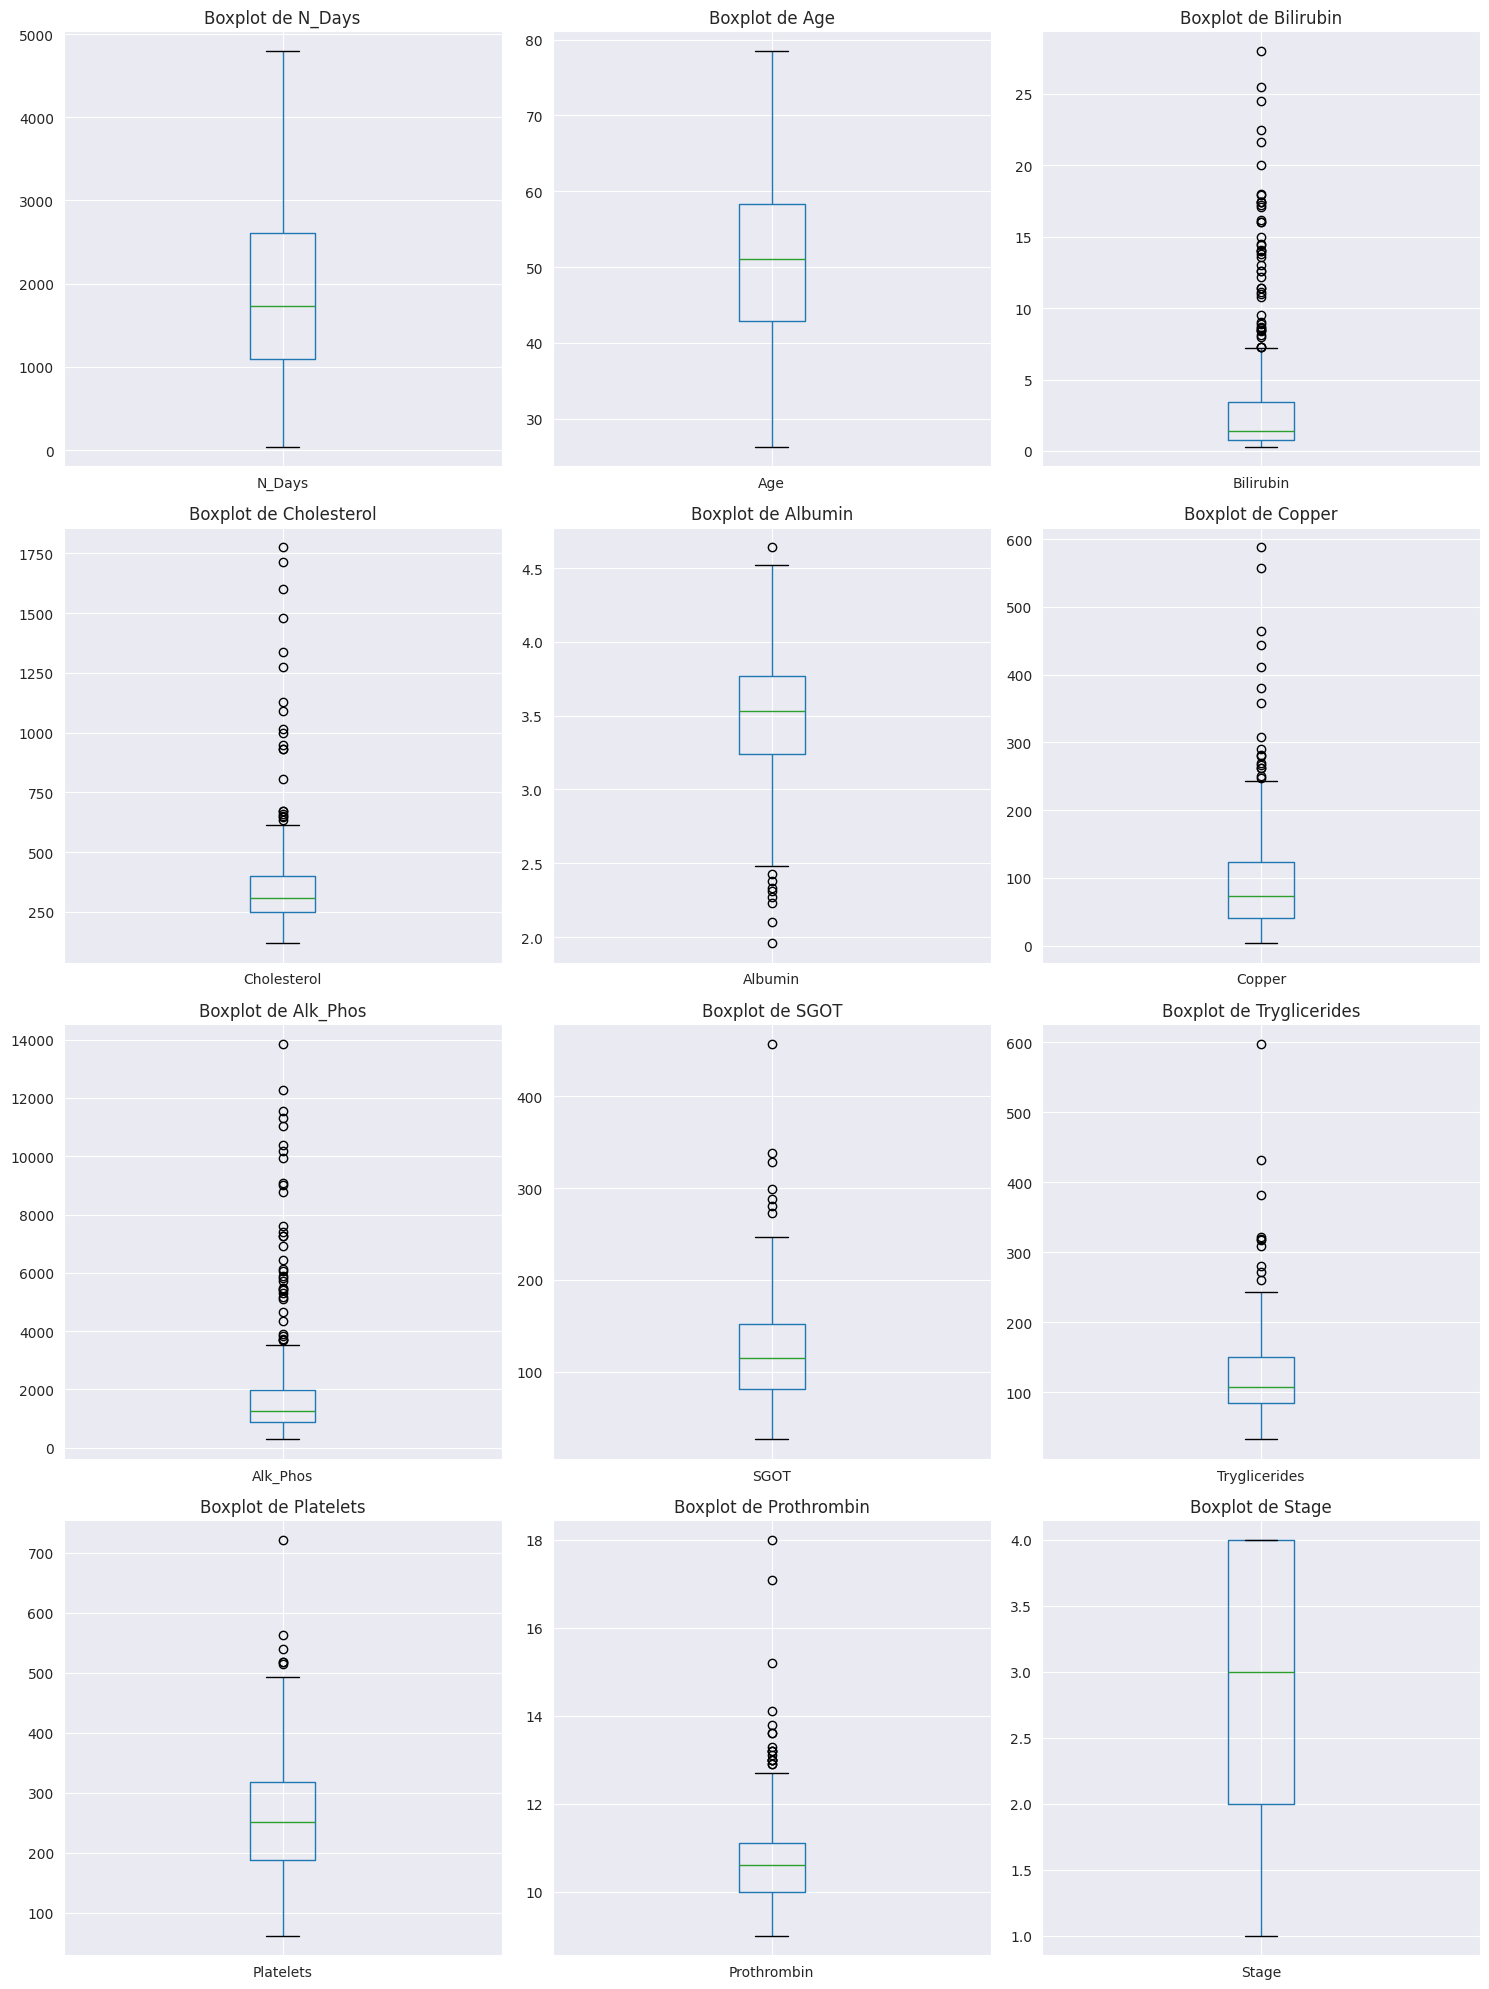

In [26]:
numeric_columns = df_cleaned.select_dtypes(include=['int', 'float']).columns

num_plots = len(numeric_columns)
num_rows = (num_plots // 3) + (num_plots % 3 > 0)
num_cols = 3

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

for i, column in enumerate(numeric_columns):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col] if num_rows > 1 else axes[col]

    df.boxplot(column, ax=ax)
    ax.set_title(f'Boxplot de {column}')

plt.tight_layout()
plt.show()

# Dump DS

## Without encoding

In [27]:
df_cleaned.to_csv(PATH_DS + "cleaned_cirrhosis.csv", index=False)

## Encoding


In [28]:
from sklearn.preprocessing import LabelEncoder

### One hot encoding adding columns

In [29]:

df_encoded_all = pd.get_dummies(df_cleaned, columns=list(string_cols_features))
print(df_encoded_all.columns)


Index(['N_Days', 'Status', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin',
       'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets',
       'Prothrombin', 'Stage', 'Spiders_N', 'Spiders_Y', 'Sex_F', 'Sex_M',
       'Edema_N', 'Edema_S', 'Edema_Y', 'Drug_D-penicillamine', 'Drug_Placebo',
       'Hepatomegaly_N', 'Hepatomegaly_Y', 'Ascites_N', 'Ascites_Y'],
      dtype='object')


In [30]:
df_encoded_all.shape

(293, 26)

In [31]:
df_encoded_all.dtypes

N_Days                    int64
Status                   object
Age                     float64
Bilirubin               float64
Cholesterol             float64
Albumin                 float64
Copper                  float64
Alk_Phos                float64
SGOT                    float64
Tryglicerides           float64
Platelets               float64
Prothrombin             float64
Stage                   float64
Spiders_N                  bool
Spiders_Y                  bool
Sex_F                      bool
Sex_M                      bool
Edema_N                    bool
Edema_S                    bool
Edema_Y                    bool
Drug_D-penicillamine       bool
Drug_Placebo               bool
Hepatomegaly_N             bool
Hepatomegaly_Y             bool
Ascites_N                  bool
Ascites_Y                  bool
dtype: object

In [32]:
X = df_encoded_all.drop(TARGET, axis=1)  # Variables predictoras
y = df_encoded_all[TARGET]

In [33]:
features_names = list(X.columns)
clases_names = list(y.unique())

In [34]:
", ".join(sorted(features_names)).replace("_", "-")

'Age, Albumin, Alk-Phos, Ascites-N, Ascites-Y, Bilirubin, Cholesterol, Copper, Drug-D-penicillamine, Drug-Placebo, Edema-N, Edema-S, Edema-Y, Hepatomegaly-N, Hepatomegaly-Y, N-Days, Platelets, Prothrombin, SGOT, Sex-F, Sex-M, Spiders-N, Spiders-Y, Stage, Tryglicerides'

### Convert booleans to int

In [35]:
bool_cols = list(X.select_dtypes(include='bool').columns)
bool_cols

['Spiders_N',
 'Spiders_Y',
 'Sex_F',
 'Sex_M',
 'Edema_N',
 'Edema_S',
 'Edema_Y',
 'Drug_D-penicillamine',
 'Drug_Placebo',
 'Hepatomegaly_N',
 'Hepatomegaly_Y',
 'Ascites_N',
 'Ascites_Y']

In [36]:
for col in bool_cols:
    X[col] = X[col].astype(int)

### One hote enconding target class no adding colums

In [37]:
clases_names

['D', 'C']

In [38]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [39]:
clases = label_encoder.classes_
clases

array(['C', 'D'], dtype=object)

In [40]:
asignaciones = label_encoder.transform(clases)
asignaciones

array([0, 1])

In [41]:

dump_ds("all", X, y_encoded, features_names, clases_names)


Saved in  /home/alvaro/Desktop/MachineLearning/PracticalApplications/data/all.pkl


In [42]:
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
N_Days,293.0,2038.665529,1137.329811,41.00000,1216.00000,1882.000000,2772.000000,4556.000000
Age,293.0,50.627117,10.569813,26.29589,42.99726,50.575342,57.235616,78.493151
Bilirubin,293.0,3.264164,4.648182,0.30000,0.80000,1.300000,3.400000,28.000000
Cholesterol,293.0,365.210871,212.755715,120.00000,253.00000,320.000000,390.000000,1775.000000
Albumin,293.0,3.516997,0.422920,1.96000,3.31000,3.550000,3.800000,4.640000
Copper,293.0,95.939579,84.207819,4.00000,41.00000,71.000000,123.000000,588.000000
Alk_Phos,293.0,2011.670990,2195.956590,289.00000,858.00000,1258.000000,2009.000000,13862.400000
SGOT,293.0,122.066143,57.757400,26.35000,79.05000,111.000000,151.900000,457.250000
Tryglicerides,293.0,124.134340,61.555800,44.00000,87.00000,114.000000,144.000000,598.000000
Platelets,293.0,259.541776,95.527975,62.00000,198.00000,255.000000,322.000000,563.000000


In [43]:
df_corred = X.copy()

In [44]:
df_corred["Target"] = y_encoded

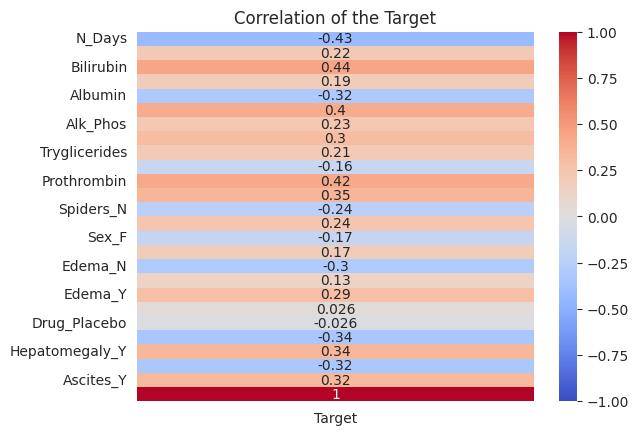

In [45]:
plt.title("Correlation of the Target")
sns.heatmap(df_corred.corr()[["Target"]], annot=True, vmin=-1, vmax=1, cmap="coolwarm")
plt.show()